# Быстрый старт в анализ данных
- с помощью Pandas и Scikit-learn, а также numpy и matplotlib

- `numpy` – матричные операции
- `matplotlib` – научная графика
- `pandas` – таблицы (DataFrame) для анализа данных
- `scikit-learn` – алгоритмы машинного обучения



Анализ качества красного вина
Датасет представляет собой результат анализа экспертами различных сортов красного португальского вина "Vinho Verde". Из-за вопросов конфиденциальности и логистики доступны только физико-химические (входные данные) и сенсорные (выходные) переменные (например, нет данных о типах винограда, винной марке, цене продажи вина и т.д.). В данном анализе будем делить вина на две группы и будем предсказывать, к какой из групп данный экземпляр вина будет принадлежать.

# Input variables (based on physicochemical tests):

- 1.`fixed acidity`
- 2.`volatile acidity`
- 3.`citric acid`
- 4.`residual sugar`
- 5.`hlorides`
- 6.`free sulfur dioxide`
- 7.`total sulfur dioxide`
- 8.`density`
- 9.`pH`
- 10.`sulphates`
- 11.`alcohol`

# Output variable (based on sensory data):

- `1.quality` (score between 0 and 10)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
#data = pd.read_csv(url, sep = ', ', engine='python')
data = pd.read_csv('C:/Users/ZORG/Desktop/ML/wine.csv', sep = ';', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [5]:
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
print(data.shape)
print(data.columns)

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [9]:
data.index

RangeIndex(start=0, stop=1599, step=1)

In [10]:
data.at[3,'fixed acidity']

11.2

In [11]:
data['fixed acidity']

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
5        7.4
6        7.9
7        7.3
8        7.8
9        7.5
10       6.7
11       7.5
12       5.6
13       7.8
14       8.9
15       8.9
16       8.5
17       8.1
18       7.4
19       7.9
20       8.9
21       7.6
22       7.9
23       8.5
24       6.9
25       6.3
26       7.6
27       7.9
28       7.1
29       7.8
        ... 
1569     6.2
1570     6.4
1571     6.4
1572     7.3
1573     6.0
1574     5.6
1575     7.5
1576     8.0
1577     6.2
1578     6.8
1579     6.2
1580     7.4
1581     6.2
1582     6.1
1583     6.2
1584     6.7
1585     7.2
1586     7.5
1587     5.8
1588     7.2
1589     6.6
1590     6.3
1591     5.4
1592     6.3
1593     6.8
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64

In [12]:
data["fixed acidity"][3]

11.2

In [13]:
data["density"].dtype.name

'float64'

In [14]:
type(data["fixed acidity"][3])

numpy.float64

In [15]:
data[['fixed acidity', 'volatile acidity']].head()

,fixed acidity,volatile acidity
0,7.4,0.70
1,7.8,0.88
2,7.8,0.76
3,11.2,0.28
4,7.4,0.70


In [16]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


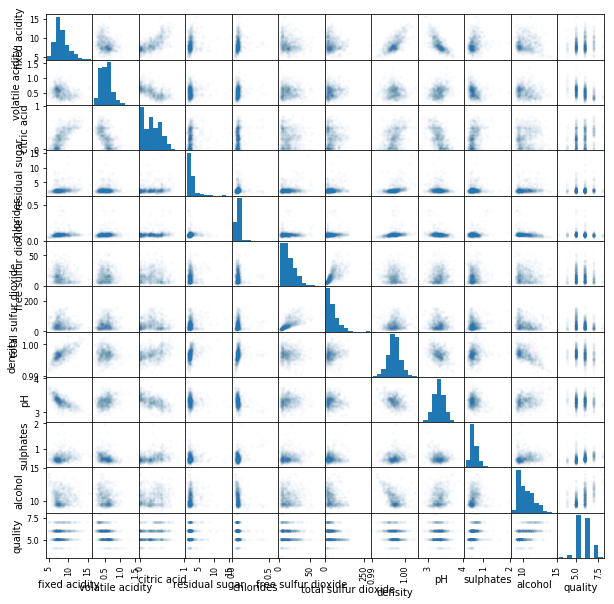

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [18]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [19]:
corrs = data.corr().abs()
np.fill_diagonal(corrs.values, -2)
corrs.max()

fixed acidity           0.682978
volatile acidity        0.552496
citric acid             0.671703
residual sugar          0.355283
chlorides               0.371260
free sulfur dioxide     0.667666
total sulfur dioxide    0.667666
density                 0.668047
pH                      0.682978
sulphates               0.371260
alcohol                 0.496180
quality                 0.476166
dtype: float64

Необходимо выявить сильно зависимые составляющие. Оказалось, что существенных зависимостей нет. Наибольшая зависимость проявляется между следующими парами составляющих: "fixed acidity" и "pH", "citric acid" и "fixed acidity" (выше 0.67). Построим графики зависимостей.

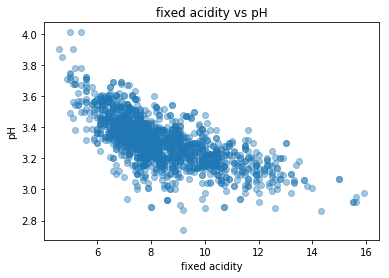

In [20]:
plt.plot(data['fixed acidity'], data['pH'], 'o', alpha = 0.40)
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.title('fixed acidity vs pH')
pass

На графике выше представлена зависимость составляющей "fixed acidity" от "pH". На графике видно, что с ростом "fixed acidity" убывает и "pH", что подтверждается вычисленным отрицательным коэфициентом корреляции между этими составляющими.

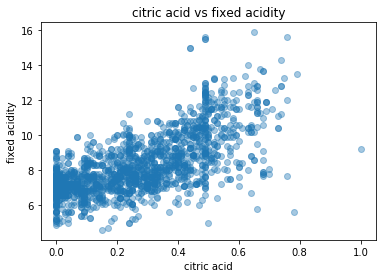

In [21]:

plt.plot(data['citric acid'], data['fixed acidity'], 'o', alpha = 0.40)
plt.xlabel('citric acid')
plt.ylabel('fixed acidity')
plt.title('citric acid vs fixed acidity')
pass

Из данного же изображения видно, что между параметрами "citric acid" и "fixed acidity" имеется значительная положительная корреляция. 

In [22]:
k = 0
for q in data["quality"]:
    if q == 7:
        k = k+1
print(k, k / data["quality"].count())

199 0.12445278298936835


Из результатов видно, что количество вин с оценкой выше 7 не превосходит 12% от их общего числа.

Построим график зависимости качесва от содержания алкоголя и плотности.

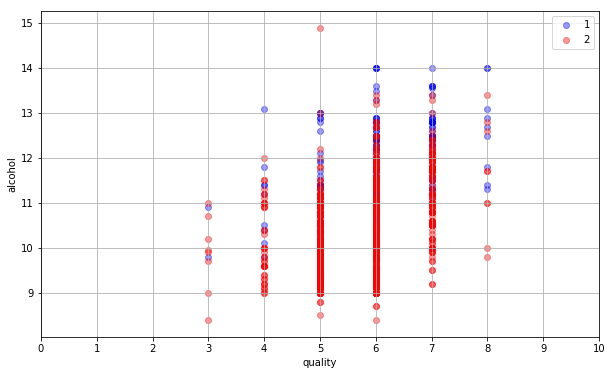

In [23]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['density'] <= 0.995]['quality'],
            data[data['density'] <= 0.995]['alcohol'],
            alpha = 0.4,
            label = '1',
            color = 'b')

plt.scatter(data[data['density'] >= 0.995]['quality'],
            data[data['density'] >= 0.995]['alcohol'],
            alpha = 0.4,
            label = '2',
            color = 'r')

plt.xlabel('quality')
plt.xticks(range(11))
plt.xlim(0, 10)
plt.ylabel('alcohol')
plt.legend()
plt.grid()

Стоит отметить по графику, что с ростом содержания алкоголя увеличивается и оценка продукта, однако это явление свойственно до определенной велечины. 

In [24]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Печально, но красных вин с оценкой выше 8 нет :(

In [25]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Выделим категориальные и числовые характеристики. В качестве категориальной характеристики будет выступать 'quality'.

In [26]:
categorical_columns = ['quality']
numerical_columns = [c for c in data.columns if c != 'quality']
print(categorical_columns)
print(numerical_columns)

['quality']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Так как все признаки числовые, то векторизацию применять не нужно.
Так же в информации к датасету указано, что пропущенных величин нет, однако удостоверимся в этом сами.

In [27]:
data.count(axis = 0)

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

# Нормализация количественных признаков
Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [28]:
data_nonbinary = data['quality']
data_nonbinary.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Нормализуем числовые характеристики.

In [29]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0)) / data_numerical.std(axis = 0)

In [30]:
data_numerical.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-1.570643e-14,-1.590973e-15,6.045057e-15,-1.344696e-15,5.098590e-15,-7.724347e-17,1.619856e-16,3.772732e-13,-5.937923e-15,-2.175036e-15,2.580411e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00


Соединим всё в одну таблицу.

In [31]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)

(1599, 12)


# X и y

Выбрасываем столбец "quality", т.к. будем прогнозировать это значение

In [32]:
X = data.drop(('quality'), axis = 1)
y = data['quality']
feature_names = X.columns
type(feature_names)

pandas.core.indexes.base.Index

In [33]:
feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [34]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1599, 11)
(1599,)


In [35]:
type(X)

pandas.core.frame.DataFrame

In [36]:
type(y)

pandas.core.series.Series

Разделим выборку на обучающую и тестовую. 30% идет в тестовую выборку.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1119 480


In [38]:
print((N_train + N_test) == data.count())

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool


# В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    

# kNN

Произведем обучение классификатора при k=4 на тренировочной выборке.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [40]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

Выполняем предсказание и подсчет средней ошибки.

In [41]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.26630920464700625 0.425


Ошибку возможно посчитать ещё одним способом.

In [42]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [43]:
err_test

0.42500000000000004

Наглядное представление работы классификатора обеспечивается методом confusion_matrix. Размер данной матрицы определяется количеством различных классов. Элемент (i,j) - число объектов, которые относятся к классу i, но классификатор отнес их к классу j

In [44]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[  0   0   2   0   0   0]
 [  0   1  12   7   1   0]
 [  0   0 164  38   5   0]
 [  0   1  74  97  23   0]
 [  0   0   8  29  14   1]
 [  0   0   0   0   3   0]]


In [45]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

# Подбор параметров

Минимизируем ошибку путем подбора параметра k

In [46]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=6)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.38963360142984804 1


In [47]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.39166666666666666


Значение ошибки уменьшилось. Ошибка предсказания стала равной ~0.392, что незначительно, но лучше предыдущего алгоритма.

# SVC

In [48]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.32350312779267204 0.38958333333333334


Результат работы данного алгоритма не дал существенного прироста к точности.

# Подбор параметров

In [49]:

from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

C:\Users\ZORG\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ZORG\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.3717605004468275 1.0


In [50]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.39166666666666666


# Random Forest


Проведем обучение Random forest классификатора на тренировочной выборке с параметром n_estimators = 100 (кол-во построенных деревьев).

In [51]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

C:\Users\ZORG\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.0 0.31875


# Значимость признаков

Построим график зависимости ошибки (на обучающей и тестовой выборке, oob) от количества используемых деревьев.

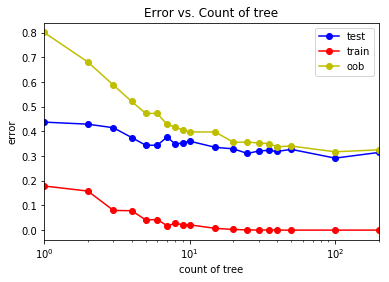

In [52]:
tree_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 100, 200)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(tree, oob_score = True)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    oob_err.append(1 - rf.oob_score_) 
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.semilogx(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

Следует использовать 25 или более деревьев. oob ошибка уменьшается с ростом количества используемых деревьев.

Минимальное значение ошибки:

In [53]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.2916666666666667


# Extremely Randomized Trees

Проведем обучение Extremely Randomized Trees классификатора на тренировочной выборке с параметром n_estimators = 100 (кол-во построенных деревьев).

In [54]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.3145833333333333


Построим график зависимости ошибки (на обучающей и тестовой выборке, oob) от количества используемых деревьев.

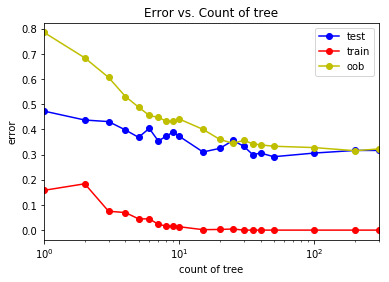

In [55]:
tree_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 100, 200, 300)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesClassifier(tree, bootstrap = True, oob_score = True)
    ert.fit(X_train, y_train)

    y_train_pred = ert.predict(X_train)
    y_test_pred = ert.predict(X_test)
    oob_err.append(1 - ert.oob_score_)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.semilogx(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

Следует использовать 20 или более деревьев.oob ошибка уменьшается с ростом количества используемых деревьев.

Минимальное значение ошибки:

In [56]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.2916666666666667


# AdaBoost

Проведем обучение AdaBoost классификатора на тренировочной выборке с параметром n_estimators = 100 (кол-во классификаторов).

In [57]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.4298480786416443 0.43333333333333335


Построим график зависимости ошибки (на обучающей и тестовой выборке) от количества используемых классификаторов.

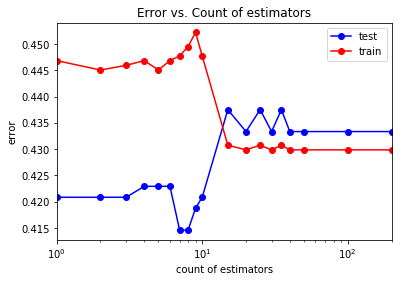

In [58]:
tree_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 100, 200)
test_err = []
train_err = []
for tree in tree_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = tree)
    ab.fit(X_train, y_train)

    y_train_pred = ab.predict(X_train)
    y_test_pred = ab.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of estimators')
plt.xlabel('count of estimators')
plt.ylabel('error')
plt.legend()
pass

Следует использовать 7 или 8 классификатора (ошибка на тестовой выборке здесь минимальна, исходя из графика).

Минимальное значение ошибки:

In [59]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.4298480786416443 0.41458333333333336


# GBT

Проведем обучение Gradient boosted trees классификатора на тренировочной выборке с параметром n_estimators = 100 (кол-во построенных деревьев).

In [60]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.08936550491510277 0.3375


Построим график зависимости ошибки (на обучающей и тестовой выборке) от количества используемых деревьев.

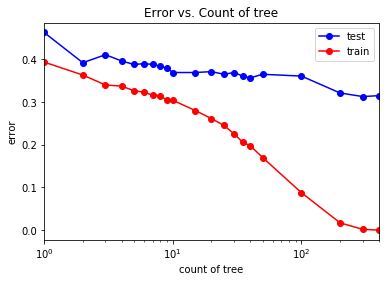

In [61]:
tree_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 100, 200, 300, 400)
test_err = []
train_err = []
for tree in tree_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = tree)
    gbt.fit(X_train, y_train)

    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

Следует использовать 300 или более деревьев (ошибка на тестовой выборке здесь минимальна, исходя из графика.
Наблюдается переобучение.

Минимальное значение ошибки:

In [62]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.3125


# MLP

Будем предсказывать к какой группе вино принадлежит на основании его характеристик.

In [63]:
X = data.drop(('quality'), axis = 1)
y = data['quality']
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


Разбиваем выборку на обучающую и тестовую. 33% идет в тестовую выборку.

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

In [65]:
from sklearn.neural_network import MLPClassifier

Обучаем MLP классификатор. Рассматриваем нейронную сеть с одним скрытым слоем со 100 нейронами.

In [66]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Проверяем качество классификатора. Вычисляем ошибки на обучающей и тестовой выборках:

In [67]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.13632119514472454 0.4109848484848485


Обучаем MLP классификатор. Рассматриваем нейронную сеть с двумя скрытыми слоями. Первый слой содержит 100 нейронов, второй - 2.

In [68]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, 2), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [69]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.19607843137254902 0.4356060606060606


При использовании нейронной сети с 2умя скрытыми слоями получить значение ошибки меньше сразу не получилось.
Попробуем сначала подобрать оптимальное значение параметра регуляризации alpha:

In [70]:
alpha_arr = np.logspace(-2, 1, 5)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

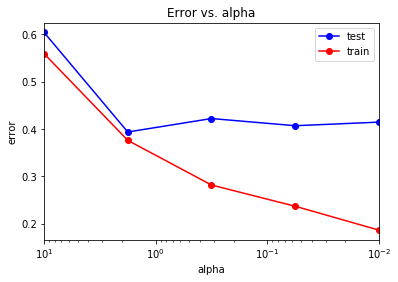

In [71]:
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Исходя из графика, следует использовать alpha = 1(ошибка на тестовой выборке здесь меньше).

Минимальное значение ошибки:

In [72]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.18674136321195145 0.3939393939393939


Оптимальное значение alpha:

In [73]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[1.77827941]


Повторим обучение при найденном оптимальном значении alpha:

In [74]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,10),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.36881419234360413
0.3939393939393939


Значение ошибки уменьшилось.

Построим график зависимости ошибки от количества нейронов в первом слое:

In [75]:
neurons_arr1 = (5, 10, 15, 20, 25, 30, 35, 40, 45, 60, 100)
neurons_arr2 = (2, 5, 10)
test_err = []
train_err = []
for neuron1 in neurons_arr1:
    for neuron2 in neurons_arr2:
        mlp_model = MLPClassifier(hidden_layer_sizes = (neuron1,neuron2), 
                                  solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

In [76]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.036414565826330535 0.375


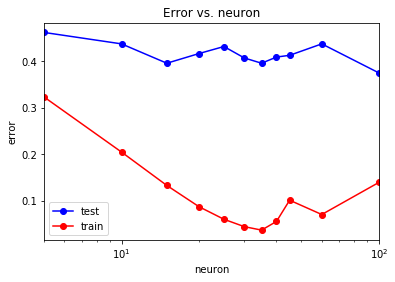

In [77]:
plt.semilogx(neurons_arr1, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr1, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr1), np.max(neurons_arr1)])
plt.title('Error vs. neuron')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

Из графика видно, что использование 15, 35, 100 нейронов дает наименьшую ошибку предсказания. 

Как показала практика, использование MLP метода не дает существенного уменьшения ошибки. Возможно причина столь великой ошибки кроется в необходимости делить вина на большое количество групп (вина имеют оценку от 3 до 8). Возможно, в действительности не имеет смысла в столь точном делении по категориям. 

Проанализировав результаты работы всех методов, можно прийти к выводу, что существующая величина ошибки на тестовых выборках сигнализирует о сложности модели, что в свою очередь приводит к переобучению. Из всех алгоритмов примененных к данной модели лучше всего себя проявил метод "Extremely Randomized Trees", показав ошибку на тестовой выборке: ~0.29

# PCA

Решаем задачу предсказания оценки вин на основании их характеристик.

Уменьшим размерность исходных данных при помощи метода PCA (principal component analysis) до 8:

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [85]:
X_PCA = pca.transform(X)

In [86]:
X.shape

(1599, 11)

In [87]:
X_PCA.shape

(1599, 8)

Как видим, размерность данных уменьшилась с 11 до 8.

In [88]:
pca.components_

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109],
       [-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
        -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
         0.35068141],
       [ 0.10147858,  0.41144893,  0.06959338,  0.04915555,  0.30433857,
        -0.01400021,  0.13630755, -0.3911523 , -0.52211645, -0.38126343,
         0.361

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 1)

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.2680965147453083 0.4270833333333333


Как видим, ошибка на тестовой выборке не изменилась.

Используя kNN классификатор (с числом соседей, равным 4), построим график зависимости ошибки (на обучающей и тестовой выборках) от количества компонент в методе:

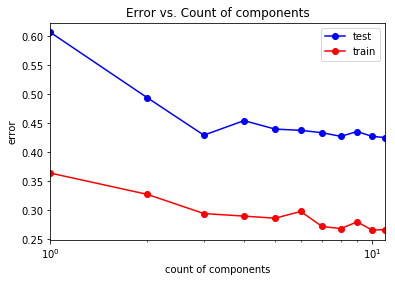

In [93]:
components_arr = np.arange(1, 12, 1)
test_err = []
train_err = []
for num_components in components_arr:
    pca = PCA(n_components = num_components)
    pca.fit(X)
    X_PCA = pca.transform(X)
    X_PCA_train, X_PCA_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 1)
    knn = KNeighborsClassifier(n_neighbors = 4)
    knn.fit(X_PCA_train, y_train)
    y_train_pred = knn.predict(X_PCA_train)
    y_test_pred = knn.predict(X_PCA_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(components_arr, test_err, 'b-o', label = 'test')
plt.semilogx(components_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('Error vs. Count of components')
plt.xlabel('count of components')
plt.ylabel('error')
plt.legend()
pass

Как видно из графика, ошибка на тестовой выборке убывает на промежутках [1, 3] & [4, 11]. Ошибка на обучающей выборке практически не меняется, при использовании 3ех компонент и более.

Вычислим минимальное значение ошибок на обучающей и тестовой выборках:

In [94]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.26541554959785524 0.425


Найдем оптимальное количество компонент:

In [95]:
opt_num_components = components_arr[test_err == min_test_err]
opt_num = opt_num_components[0]
print(opt_num)

11


Оптимальное количество компонент равно 11 и это видно на графике выше (их всего 11). Из этого можно сделать вывод, что такая высокая ошибка складывается из-за большой величины разброса оценок вина (диапазон 3-8).